In [1]:
#Standard Imports
import pandas as pd
from collections import Counter
import requests as r
import matplotlib.pyplot as plt
import heapq
import numpy as np
%matplotlib inline

In [2]:
#URL of text for US Constitution from `gutenberg.org`
url = 'http://www.gutenberg.org/cache/epub/5/pg5.txt'
#Get text and store in an object. 
text = r.get(url).text.strip().replace('\n', '')

#Develop char counts from the text
textDict = dict(Counter(text))

#Store results in a dataframe
df = pd.DataFrame({'char': list(textDict.keys()), 'char_count': list(textDict.values())})
df['freq'] = df['char_count'] * (1/df.char_count.sum())
df = df.sort_values(by='freq', ascending=False).reset_index(drop=True)

#Store results in a dict
freq = {row['char']:row['freq'] for index, row in df.iterrows()}

In [3]:
print('The First 2,000 Characters of the raw text: \n---')
text[:2000]

The First 2,000 Characters of the raw text: 
---


'\ufeffThe Project Gutenberg EBook of The United States\' Constitution\rby  Founding Fathers\r\rCopyright laws are changing all over the world. Be sure to check the\rcopyright laws for your country before downloading or redistributing\rthis or any other Project Gutenberg eBook.\r\rThis header should be the first thing seen when viewing this Project\rGutenberg file.  Please do not remove it.  Do not change or edit the\rheader without written permission.\r\rPlease read the "legal small print," and other information about the\reBook and Project Gutenberg at the bottom of this file.  Included is\rimportant information about your specific rights and restrictions in\rhow the file may be used.  You can also find out about how to make a\rdonation to Project Gutenberg, and how to get involved.\r\r\r**Welcome To The World of Free Plain Vanilla Electronic Texts**\r\r**eBooks Readable By Both Humans and By Computers, Since 1971**\r\r*****These eBooks Were Prepared By Thousands of Volunteers!*****\

In [4]:
len(text.split(' '))

6636

In [5]:
#https://stackoverflow.com/questions/46825980/huffman-coding-tree-traversal
#https://docs.python.org/3/library/heapq.html#module-heapq
#https://sites.fas.harvard.edu/~libs111/files/lectures/unit9-1.pdf
#https://www.cs.toronto.edu/~radford/csc310.F11/week3.pdf

heap_freq = []
for char, frq in freq.items():
    heap_freq.append([frq, [char, ""]])

#Sorts in decending order, places data in the heap structure.
heapfy = heapq.heapify(heap_freq)

#Loop through heap elements as it gets shorter.
while len(heap_freq) > 1:
    # Take the two smallest values from  the heap.
    left_node = heapq.heappop(heap_freq)
    right_node = heapq.heappop(heap_freq)
    
    # Return the list elements from left node.
    left_elements = left_node[1:]
    # Return the list elements from  the right node.
    right_elements = right_node[1:]
    
    # Scan each element in the left node and append a zero.
    for each in left_elements:
        each[1] = each[1] + '0'
      
    # Scan each element in the right node and append a one.    
    for each in right_elements:
        each[1] = each[1] + '1'

    # Append the resulting elements (coded char and new freq) back into the heap.
    heapq.heappush(heap_freq, [left_node[0] + right_node[0]] + left_node[1:] + right_node[1:])

# Create dict of all of the coded char
huffDict = {each[0]:each[1] for each in heapq.heappop(heap_freq)[1:]}
huffDict

{'s': '0000',
 'b': '001000',
 'y': '101000',
 'd': '11000',
 'e': '100',
 'i': '0010',
 'n': '1010',
 'k': '00000110',
 'N': '10000110',
 'T': '1000110',
 ',': '100110',
 ';': '000010110',
 'H': '100010110',
 ']': '00010010110',
 '7': '010010010110',
 '@': '00110010010110',
 'X': '10110010010110',
 'Q': '1110010010110',
 '"': '1010010110',
 'G': '110010110',
 'S': '1010110',
 'v': '0110110',
 'O': '01110110',
 ':': '0011110110',
 'q': '1011110110',
 '*': '111110110',
 'a': '1110',
 'l': '00001',
 'm': '010001',
 'I': '00110001',
 'R': '10110001',
 'A': '01110001',
 "'": '00011110001',
 'z': '10011110001',
 '-': '1011110001',
 '2': '0111110001',
 'V': '1111110001',
 'o': '1001',
 't': '0101',
 'w': '0001101',
 'E': '01001101',
 '0': '011001101',
 '/': '00111001101',
 '~': '000010111001101',
 '\ufeff': '100010111001101',
 '%': '10010111001101',
 '8': '1010111001101',
 '3': '110111001101',
 '(': '01111001101',
 ')': '11111001101',
 'D': '000101101',
 'M': '100101101',
 'L': '010101101',


In [6]:
#Calculate Expected Information from the raw text.

df['entropy'] = -1 * df['freq'] * np.log2(df['freq'])
info_entropy = sum(df.entropy.to_list())
print('Information Entropy: {:.3f} bits'.format(info_entropy))

Information Entropy: 4.685 bits


In [7]:
#Encode the raw text using Huffman Encoding based on starter code presented in class.
#Calculated the Average Codeword Length.

encoded = ''
for i in range(len(text)):
    encoded += huffDict[text[i]]
    
print('Average Codeword Length After Encoding: {:.3f} bits'.format(len(encoded)/len(text)))

Average Codeword Length After Encoding: 4.719 bits


In [8]:
#Show the first 2000 characters of the encoded text.
print('The First 2,000 Characters of the Encoded Text: \n---\n{}'.format(encoded[:2000]))

The First 2,000 Characters of the Encoded Text: 
---
10001011100110110001101110110001111101101011111001011101111110001011101010111100101101001110101100101000100010001111011011101101001101011011111100110010000011001110010001110111000110111011000111010111111010001001011001100001110101100101111001011000000000111100010111111011110011010000001010010010110011101010010100110101111110010001010000110110110101101100110011110101100000101010011011101101101011011110010111101100011110000111111111111111101111001001111110100001111001001101111110101010110000111100001101000001111100111110001101011111101111010100110111001010100110111011111000001000010111001011011010001111011010111101100011000110110010111100001110000111011101101101111110001100001001110111110001101011001011010111111011000101110000011001101011110110011111101011110010011111101000011110010011011111101010101100001111000011010000011000111100101111011101000100110011101111011010111100110011110100101011111010000110010001000001111001011111000111100

In [9]:
#Determine number of rows in Original DataFrame
print('Number of Rows in Original DataFrame: {}'.format(df.shape[0]))

Number of Rows in Original DataFrame: 88


In [10]:
#Determine number of rows in Encoded DataFrame
df_encode = pd.DataFrame({'char':  list(huffDict.keys()), 'encoded_char':  list(huffDict.values())})
df_encode.shape
print('Number of Rows in Encoded DataFrame: {}'.format(df_encode.shape[0]))

Number of Rows in Encoded DataFrame: 88


In [11]:
#Show that all of rows have been maintained.
df = pd.merge(df, df_encode, on='char', how='inner').sort_values(by='freq', ascending=False)
print('Number of Rows in Merged DataFrame: {}'.format(df.shape[0]))

Number of Rows in Merged DataFrame: 88


In [12]:
# Alternative calculation of the average codeword length
df['encoded_char_len'] = df['encoded_char'].str.len()
df['product'] = df['encoded_char_len'] * df['freq']
sum(df['product'].to_list())
print('Average Codeword Length After Encoding (method two): {:.3f} bits'.format(sum(df['product'].to_list())))

Average Codeword Length After Encoding (method two): 4.719 bits


In [13]:
#Return the 15 most frequent characters. 
df.head(15)

,char,char_count,freq,entropy,encoded_char,encoded_char_len,product
0,,6635,0.155715,0.417786,011,3,0.467144
1,e,4248,0.099695,0.331619,100,3,0.299085
2,t,3094,0.072612,0.274738,0101,4,0.290448
3,o,2568,0.060268,0.244233,1001,4,0.241070
4,a,2358,0.055339,0.231072,1110,4,0.221356
5,n,2273,0.053344,0.225568,1010,4,0.213377
6,i,2114,0.049613,0.214979,0010,4,0.198451
7,s,1962,0.046046,0.204479,0000,4,0.184182
8,r,1927,0.045224,0.202005,01111,5,0.226121
9,h,1586,0.037221,0.176717,11101,5,0.186107


In [14]:
#Return the 15 least frequent characters. 
df.tail(15)

,char,char_count,freq,entropy,encoded_char,encoded_char_len,product
73,6,8,0.000188,0.002324,1111001011111,13,0.002441
74,8,6,0.000141,0.001802,1010111001101,13,0.001831
75,Q,5,0.000117,0.001532,1110010010110,13,0.001525
76,%,3,0.000070,0.000971,10010111001101,14,0.000986
79,?,2,0.000047,0.000675,110111001011111,15,0.000704
77,@,2,0.000047,0.000675,00110010010110,14,0.000657
78,X,2,0.000047,0.000675,10110010010110,14,0.000657
80,~,1,0.000023,0.000361,000010111001101,15,0.000352
81,>,1,0.000023,0.000361,0010111001011111,16,0.000375
82,﻿,1,0.000023,0.000361,100010111001101,15,0.000352


/opt/miniconda3/envs/ssie/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/miniconda3/envs/ssie/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


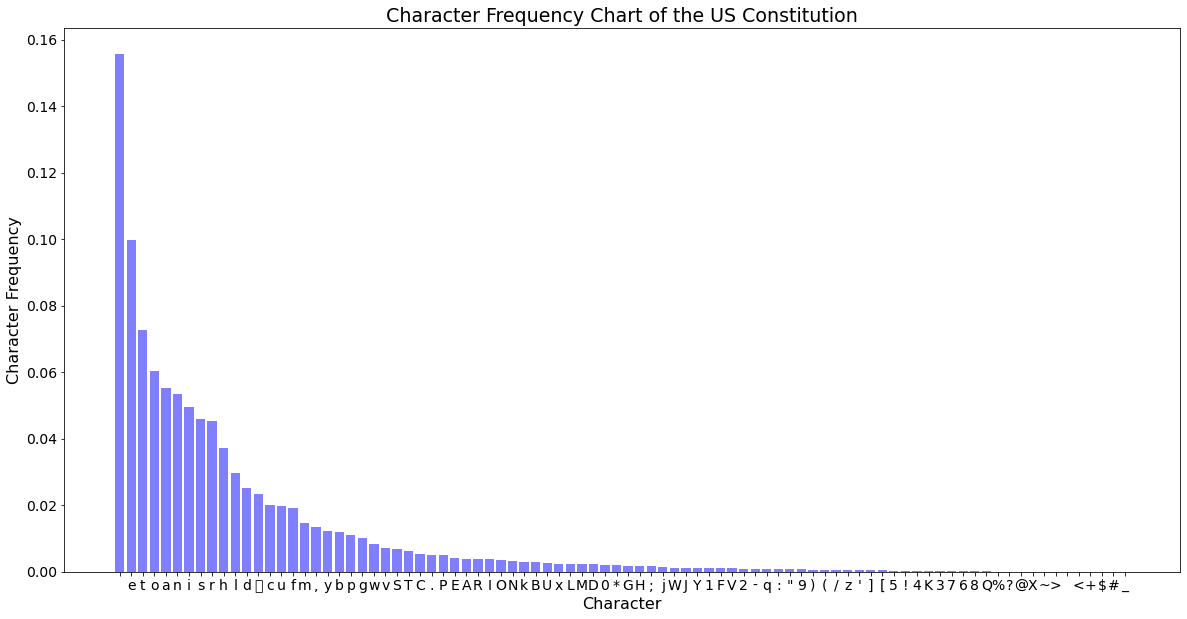

In [15]:
#Plot the distribution of char from the raw text.

plt.figure(figsize=(20, 10))
plt.bar(df.char, df.freq, color='blue', alpha=0.5)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Character', fontsize=16)
plt.ylabel('Character Frequency', fontsize=16)
plt.title('Character Frequency Chart of the US Constitution', fontsize=19)
plt.show()